In [11]:
import math

# Volume flowrate in [mL/h]
flowRate = 800
# Lenght of the packed section in the column [mm]
length = 235 
# Column diameter [mm]
diameter = 16
# Feed injection volume [mL]
feedVol = 5

# Calculation of the feed time [s]
feedTime = feedVol/flowRate*3600

# Concentration of the balanced component in the feed [mg/mL]
feedConc = 2
# Total porosity of the sorbent packing [-]
porosity = 0.5
# Henry's constant of the linear isotherm [-]
henryConst = 2.5
# Axial dispersion coefficient [cm^2/min]
disperCoef = 0.95

# Calculation of the flow speed [mm/s]
flowSpeed = (2*flowRate*1000/3600)/(math.pi*(diameter**2)*porosity)
print('Flow speed:   ' + str(round(flowSpeed,2)) + ' [mm/s]')

Flow speed:   1.11 [mm/s]


In [6]:
import numpy as np

# Defining constants
C1 = (1/disperCoef)+((1+porosity)*henryConst/(porosity*disperCoef))
C2 = flowSpeed/disperCoef

#-------------------------------------------------------------------------------
# FINITE DIFFERENCE EXPLICIT SCHEMES
#-------------------------------------------------------------------------------
# BOUDARIES

def Danckwert_lb_c2ap(c_i1, c_i0, dx, dt, C1, C2, cIn):
  # First derivative defined as Um/Dax*(c[t,0]-cIn)
  # Second derivative used aproxmation of fictitious point c[t,0-1] = c[t,0+1]
  # Then second order centered difference for second derivative in x
  # First-order Forward difference for first derivative in t 
  c_next = c_i0 + ((dt/C1)*(2*c_i1-2*c_i0)/(dx**2)) - ((dt*(C2**2)*(c_i0-cIn))/C1)
  return c_next
  
def Danckwert_rb_c2ap(c_iN1, c_iN, dx, dt, C1):
  # Second derivative used aproxmation of fictitious point c[t,N+1] = c[t,N-1]
  # Then second order centered difference for second derivative in x
  # First-order Forward difference for first derivative in t  
  c_next = c_iN+((dt*(2*c_iN1-2*c_iN))/(C1*(dx**2)))
  return c_next

def Danckwert_lb_fwrd2(c_i1, c_i2, c_i0, dx, dt, C1, C2, cIn):
  # First derivative defined as Um/Dax*(c[t,0]-cIn)
  # Second derivative used aproxmation of fictitious point c[t,0-1] = c[t,0+1]
  # Then second order centered difference for second derivative in x
  # First-order Forward difference for first derivative in t 
  c_next = c_i0 + ((dt/C1) * ((c_i2 - 2*c_i1 + c_i0)/(dx**2))) - ((dt*(C2**2)*(c_i0-cIn))/C1)
  return c_next

#-------------------------------------------------------------------------------
# BODIES

def c1c2x_fwrdt(c_in, c_i1,c_in1, dx, dt, C1, C2): 
  # First derivative defined as ZERO dc/dt = 0
  # Second derivative used aproxmation of fictitious point c[t,N+1] = c[t,N-1]
  # Then second order centered difference for second derivative in x
  # First-order Forward difference for first derivative in t  
  c_next = c_in + ((dt/C1) * ((c_i1-2*c_in+c_in1)/(dx**2))) - (C2*dt*(c_i1-c_in1))/(2*C1*dx)
  return c_next 

def fwrd1fwrd2x_fwrdt(c_in, c_i1,c_i2, dx, dt, C1, C2): 
  # First derivative defined as ZERO dc/dt = 0
  # Second derivative used aproxmation of fictitious point c[t,N+1] = c[t,N-1]
  # Then second order centered difference for second derivative in x
  # First-order Forward difference for first derivative in t  
  c_next = c_in + ((dt/C1) * ((c_i2 - 2*c_i1 + c_in)/(dx**2))) - ((C2*dt*(c_i1 - c_in))/(2*C1*dx))
  return c_next  

# fwrd1fwrd2x_fwrdt(c[n,i], c[n+1,i],c[n+2,i], dx, dt, C1, C2)

  # Left boundary
  #c[i+1,0] = (dt*(2*c[i,0+1]-2*c[i,0])/(C1*dx**2))-((dt*(C2**2)*(c[i,0]-cIn))/C1)+c[i,0]
  #c[i+1,0] = (dt*(2*c[i,0+1]-2*c[i,0])/(C1*dx**2))-C2*(c[i,0]-cIn)+c[i,0]
  #c[i+1,0] = feedConc


  #c[i+1,n] = c[i,n] + dt*(c[i,n+1]-2*c[i,n]+c[i,n-1])/(C1*(dx**2)) - (C2*dt*(c[i,n+1]-c[i,n]))/(C1*dx)

  # Right Boundary
  #c[i+1,Nx] = c[i,Nx]+((dt*(2*c[i,Nx-1]-2*c[i,Nx]))/(C1*(dx**2)))

Feed Mass:   10 mg
Outlet Mass:   4.78442839677351e+20 mg
Difference:   -4.78442839677351e+20 mg   -4.784428396773509e+21 %

----------------------------------------------------------------------------------------------------
Complete results mesh of size
Number of Elements: 40401
Shape of the matrix: (201, 201)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200
0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.0,2.000000e+00
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,0.0,2.000000e+00
2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.553313e+00,0.0,3.809549e-01
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.846922e+00,3.259704e+00,0.0,7.256332e-02
4,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.042350e+00,1.456067e+00,4.161522e+00,0.0,1.382168e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,2.0,2.0,

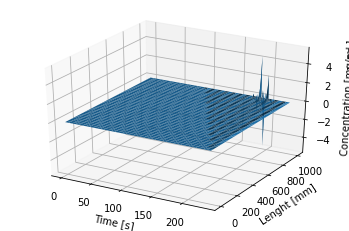

In [14]:
import numpy as np
#_______________________________________________________________________________
# DATA STRUCTURES PREPARATION

# Defining finite time of the experiment [s] 
time = 1000
# Defining number of spatial differences
Nx = 200
# Defining number of time differences
Nt = 200
# Preparation of space vector
x = np.linspace(0, length, Nx+1)
# Calculating space step [mm]
dx = length/Nx

# Preparation of time vector
t = np.linspace(0, time, Nt+1)
# Calculating space step [mm]
dt = time/Nx

# Preparation of solution matrix
c = np.zeros((len(t),len(x))) # Time advancing by row, space advancing by column

#_______________________________________________________________________________
# NUMERICAL SOLUTION

# Implementing initial conditions
C_0 = np.zeros(len(x))
C_0[:] = feedConc

#c[0,0] = feedConc # For the left boudary
c[0,:] = C_0 # First row (time = 0) are all elements C_0

tStep = time/Nt # time step [s]
feedSteps = feedTime//tStep # whole number of feed iterations
feedTimeAprox = feedTime%tStep # aproximation of division
# rounding iteration step based on defined feed parameters
if feedTimeAprox >= 0.5:
  feedSteps += 1

# Implementing discretization
for i in range(0,Nt-1): # Advance in time
#----------------------------------------------------------------------  
  # Feed pulse implementation
  #if i<= feedSteps:
    #cIn = feedConc
  #else:
    #cIn = 0
  cIn = feedConc
  # Calculating left boudary [x=0] in time ti
  c[i+1,0] = Danckwert_lb_c2ap(c[i,1], c[i,0], dx, dt, C1, C2, cIn)
  c[i+1,1] = c1c2x_fwrdt(c[i,1], c[i,2], c[i,0], dx, dt, C1, C2)
  c[i+1,2] = c1c2x_fwrdt(c[i,2], c[i,3], c[i,1], dx, dt, C1, C2)
#----------------------------------------------------------------------
  for n in range(3,Nx-1): # Calculating values of space differences in time ti
  # Calculating value for space xn in time ti
    c[i+1,n] = fwrd1fwrd2x_fwrdt(c[i,n], c[i,n+1],c[i,n+2], dx, dt, C1, C2)
#----------------------------------------------------------------------
  # Calculating right boundary [x=L] in time ti
  c[i+1,Nx] = Danckwert_rb_c2ap(c[i,Nx-1], c[i,Nx], dx, dt, C1)

#_______________________________________________________________________________
# MASS BALANCE CHECK

feedMass = feedVol * feedConc
outConc = c[-2,:]
massCumul = 0

for i in range(0,Nx):
  actConc = outConc[i]
  massCumul += (tStep*flowRate*actConc/3600)
massDifference = feedMass - massCumul 

print('Feed Mass:   ' + str(round(feedMass,2)) + ' mg')
print('Outlet Mass:   ' + str(round(massCumul,2)) + ' mg')
print('Difference:   ' + str(round(massDifference,2)) + ' mg   '
      + str(round((massDifference*100/feedMass),2)) + ' %\n')

#_______________________________________________________________________________
# SAVING

from IPython.display import display
import pandas as pd
results = pd.DataFrame(c)
results.to_csv("/content/drive/MyDrive/Python_Colab/results_centExpl.csv", sep=',',index=False)
print(100*'-')
print('Complete results mesh of size')
print('Number of Elements: ' + str(results.size))
print('Shape of the matrix: ' + str(results.shape))
display(results)

#_______________________________________________________________________________
# PLOTTING

from mpl_toolkits.mplot3d import Axes3D  
# Axes3D import has side effects, it enables using projection='3d' in add_subplot
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

X, Y = np.meshgrid(x,t)
Z = c.reshape(X.shape)

ax.plot_surface(X, Y, Z)

ax.set_xlabel('Time [s]')
ax.set_ylabel('Lenght [mm]')
ax.set_zlabel('Concentration [mg/mL]')

plt.show()
